## Homework 3, Problem 3 on inhomogeneous Poisson processes

ECE C143A/C243A, Spring Quarter 2020, Prof. J.C. Kao, TAs J. Lee, T. Monsoor.


 In this problem, we will use the same simulated neuron as in
  Problem 2, but now the reaching angle $s$ will be time-dependent
  with the following form:
$$ s(t) = t^2 \cdot \pi,$$

where $t$ ranges between 0 and 1 second. This will be refered as *s(t)* equation in the questions.


In [118]:
"""
ECE C143/C243 Homework-3 Problem-3

"""
import numpy as np
import matplotlib.pyplot as plt
import nsp as nsp # these are helper functions that we provide.
import scipy.special
from scipy.stats import poisson
from scipy.stats import expon 

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### (a) (6 points) Spike trains
Generate 100 spike trains, each 1 second in duration, according to
an inhomogeneous Poisson process with a firing rate profile defined
by tuning equation, $$\lambda(s) = r_0 + (r_\text{max} - r_0)\cos(s-s_\text{max})$$ 
and the $s(t)$ equation, $$ s(t) = t^2 \cdot \pi$$

In [2]:
r_0 = 35 # (spikes/s)
r_max = 60 # (spikes/s)
s_max = np.pi/2 # (radians)
T = 1000 # trial length (ms)

In [3]:
np.random.exponential(1.0/r_max * 1000)

1.6297281572501996

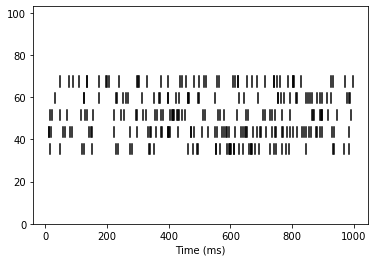

In [41]:
## 3a
num_trials = 100 # number of total spike trains
num_rasters_to_plot = 5 # number of spike trains to plot
#====================================================#
# YOUR CODE HERE:
#   Generate the spike times for 100 trials of an inhomogeneous
#   Poisson process.  Plot 5 example spike rasters.
#====================================================#
spike_times = list()
for i in range(num_trials):
    homo = list();
    tn = np.random.exponential(1/r_max* 1000.0);
    while(tn <= T):
        homo.append(tn);
        tn =tn+ np.random.exponential(1/r_max* 1000.0);

    spikes =list();
    for tn in homo:
        s = (tn/1000)*(tn/1000)*np.pi;
        r = r_0 + (r_max - r_0)*np.cos(s-s_max);
        p = r/r_max
        if (p > np.random.uniform()):
            spikes.append(tn)
    spike_times.append(np.array(spikes)) ;    
    

nsp.PlotSpikeRaster(spike_times[0:num_rasters_to_plot])
#====================================================#
# END YOUR CODE
#====================================================#


### (b) (5 points) Spike histogram
  Plot the spike histogram by taking spike counts in non-overlapping
  20 ms bins, then averaging across the 100 trials.  The spike
  histogram should have firing rate (in spikes / second) as the
  vertical axis and time (in msec, not time bin index) as the
  horizontal axis. Plot the expected firing rate profile defined by equations
 tuning equation and *s(t)* equation on the same plot. 

In [48]:
print(len(spike_times[99]))

42


Text(0.5, 0, 'Time(ms)')

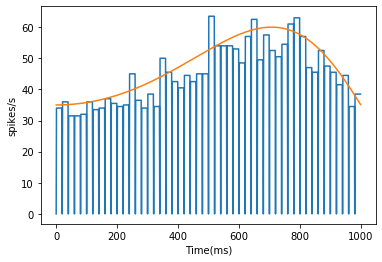

In [95]:
# 3b
bin_width = 20 # (ms)
#====================================================#
# YOUR CODE HERE:
#   Plot the spike histogram
#====================================================#
mean =[0]*1000
time_start = 1;
time_end = bin_width;
while(time_end <= T):
    counter = 0;
    for i in range(num_trials):
        for j in range(len(spike_times[i])):
            if(spike_times[i][j] < time_end and spike_times[i][j] > time_start):
                counter += 1;
                
    m = counter/num_trials;
    m = m*50;
    for k in range(time_start, time_end):
            mean[k] = m;
    time_start += bin_width;
    time_end += bin_width;

plt.plot(mean)

expect =[]
for tt in range(T):
    s = (tt/1000)*(tt/1000)*np.pi;
    r = r_0 + (r_max - r_0)*np.cos(s-s_max);
    expect.append(r);

plt.plot(expect)
#====================================================#
# END YOUR CODE
#====================================================#

plt.ylabel('spikes/s')
plt.xlabel('Time(ms)')

#### Question:
Does the spike histogram agree with the expected firing rate profile?

#### Your Answer:

Yes, the histogram fits the expected curve well.

### (c) (6 points) Count distribution
  For each trial, count the number of spikes across the entire trial.
  Plot the normalized distribution of spike counts.  Fit a Poisson
  distribution to this empirical distribution and plot it on top of
  the empirical distribution.  

C:\Users\李冠旻\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


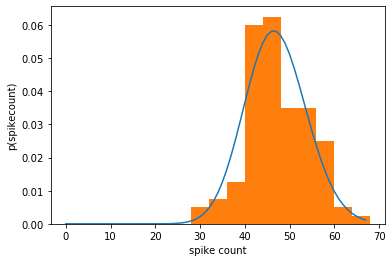

In [74]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of spike counts
#====================================================#
spike_counts = np.zeros(num_trials);
for i in range(num_trials):
    spike_counts[i] = len(spike_times[i]);
mean = np.mean(spike_counts)
plt.plot(scipy.stats.poisson.pmf(mu=mean, k=np.arange(np.max(spike_counts))))
plt.hist(spike_counts, normed=True)
#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('spike count')
plt.ylabel('p(spikecount)')
plt.show()

#### Question:
Should we expect the spike counts to be Poisson-distributed?

#### Your Answer:

Yes, since the spike count histogram followed the poisson curve pretty well, we could make the assumption that it's a poisson distribution.

### (d) (5 points) ISI distribution
  Plot the normalized distribution of ISIs.  Fit an exponential
  distribution to the empirical distribution and plot it on top of the
  empirical distribution. 

In [75]:
print(len(spike_times))

100


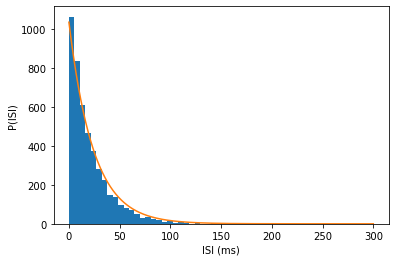

In [131]:
#====================================================#
# YOUR CODE HERE:
#   Plot the normalized distribution of ISIs
#====================================================#
ISI =list()
for i in range(num_trials):
    for j in range(len(spike_times[i])-1):
        ISI.append(spike_times[i][j+1]-spike_times[i][j])

mean = np.mean(ISI)
exp = expon.pdf(np.arange(0,300,0.1)/(5*num_trials), scale=1/mean)
plt.hist(ISI,50)
plt.plot(np.arange(0,300,0.1), 50*exp)   

#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('ISI (ms)')
plt.ylabel('P(ISI)')
plt.show()

#### Question: 
Should we expect the ISIs to be exponentially-distributed?
(Note, it is possible for the  empirical distribution to strongly resemble an exponential distribution even if the data aren't exponentially distributed.)

#### Your Answer:

Based on the graph above, since it followed the exponential distribution well, we can make the assumption that it's exponentially distributed.